<a href="https://colab.research.google.com/github/skyler-ud/FDSFE_SLindsey/blob/main/labs/Log_Scales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
url="https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv"
grbAG=pd.read_csv(url)
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


In [7]:
grbAG.columns

Index(['filter', 'time', 'mag', 'magerr', 'upperlimit'], dtype='object')

In [10]:
grbAG[['time', 'mag', 'magerr', 'upperlimit']].corr() #Here we see magnitude is 84.69% correlated to time, so that's good for TSA stuff

,time,mag,magerr,upperlimit
time,1.000000,0.846971,0.517663,0.506833
mag,0.846971,1.000000,0.602576,NaN
magerr,0.517663,0.602576,1.000000,0.999288
upperlimit,0.506833,NaN,0.999288,1.000000


In [19]:
grbAG.plot(x='time',y='mag',kind='scatter')

SyntaxError: positional argument follows keyword argument (<ipython-input-19-f0fba2535ccb>, line 1)

In [14]:
import numpy as np
x=np.arange(0,100,0.1)
y=x.copy()

<ipython-input-17-945b646452ce>:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x,np.log10(y))


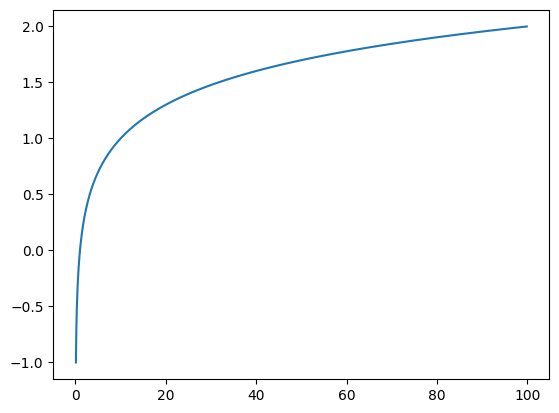

In [17]:
import matplotlib.pyplot as plt
plt.plot(x,np.log10(y))

In [20]:
#Going back to the actual data
grbAG['logtime']=np.log10(grbAG.loc[:,'time'])

(24.0, 11.7)

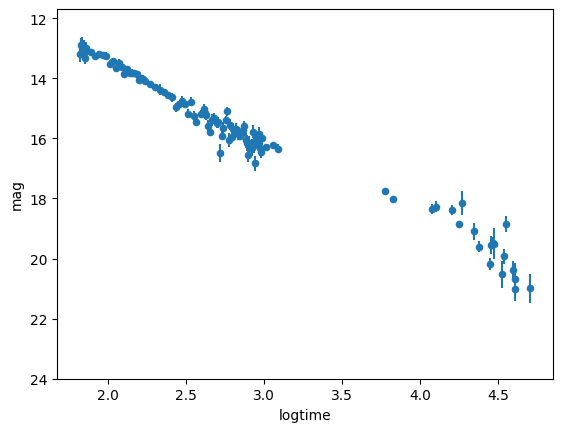

In [24]:
ax=grbAG.plot(x='logtime',y='mag',kind='scatter',yerr='magerr')
ax.set_ylim(24,11.7)

In [28]:
X=np.atleast_2d(grbAG['logtime']).T
y=grbAG['mag']

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#x=grbAG['logtime']
y=grbAG['mag']
lr.fit(X,y)

ValueError: Input y contains NaN.